Étude de cas : speed dating

# Introduction

Les données sont proposées sur Kaggle à l'adresse https://www.kaggle.com/datasets/ulrikthygepedersen/speed-dating avec la préface suivante :

*This data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four-minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests. The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information.*

*From http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/*

Ce jeu de données présente plusieurs problèmatiques possibles. On cherchera ici à quantifier dans quelle mesure les différentes préférences exprimées se traduisent par une rencontre à la suite du speed-dating. 

Le contexte envisagé serait une application du point de vue des organisateurs (à une plus grande échelle, s'il fallait faire une sélection sur qui rencontre qui au lieu de faire passer chacun avec tous les autres), pour déterminer qui rencontrera qui.

# Mise en place

## Import et lecture des données

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [88]:
file_in='speeddating.csv'
data_ini=pd.read_csv(file_in)
data_ini.shape

(8378, 123)

## Premiers filtrages

Une grande partie des colonnes contient des éléments superflus, sous forme de regroupement des données par classes (par exemple de 0 à 5, de 6 à 8 et de 9 à 10). Ces colonnes commencent par 'd_' et seront supprimées. 
La première colonne est également inutilisée.

On passe ainsi de 123 à 66 colonnes, dont on va voir l'aspect général.

In [89]:
cols_i=data_ini.columns
cols=[]
for i in cols_i :
    if i[0:2] != 'd_' :
        cols.append(i)
cols=cols[1:]

data=data_ini[cols]

print(data.shape)

(8378, 66)


In [275]:
pd.set_option('display.max_columns', None)
data.head()

,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match
0,1.0,b'female',21.0,27.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',0,2.0,4.0,b'Law',35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.14,3.0,2.0,4.0,7.0,6.0,0.0,True,False,False
1,1.0,b'female',21.0,22.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',0,2.0,4.0,b'Law',60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.54,3.0,2.0,4.0,7.0,5.0,1.0,True,False,False
2,1.0,b'female',21.0,22.0,b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',1,2.0,4.0,b'Law',19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.16,3.0,2.0,4.0,7.0,NaN,1.0,True,True,True
3,1.0,b'female',21.0,23.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',0,2.0,4.0,b'Law',30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.61,3.0,2.0,4.0,7.0,6.0,0.0,True,True,True
4,1.0,b'female',21.0,24.0,b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',0,2.0,4.0,b'Law',30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.21,3.0,2.0,4.0,6.0,6.0,0.0,True,True,True


Je vais aussi remplacer les cases avec des b' ', en particulier quand le résultat devient un nombre, et raccourcir les champs trop long, pour faciliter le traitement.

In [274]:
data.replace("b'1'" , 1, inplace=True)
data.replace("b'0'" , 0, inplace=True)
data.decision=data.decision.astype(bool)
data.decision_o=data.decision_o.astype(bool)
data.match=data.match.astype(bool)

C:\Users\Olivier\AppData\Local\Temp\ipykernel_21236\1657608775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace("b'1'" , 1, inplace=True)
C:\Users\Olivier\AppData\Local\Temp\ipykernel_21236\1657608775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace("b'0'" , 0, inplace=True)
C:\Users\Olivier\AppData\Local\Temp\ipykernel_21236\1657608775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [287]:
data.dtypes

wave                float64
gender               object
age                 float64
age_o               float64
race                 object
                     ...   
guess_prob_liked    float64
met                 float64
decision               bool
decision_o             bool
match                  bool
Length: 66, dtype: object

In [86]:
#à faire plus tard si je traite la partie field
# list_field=np.unique(data.field)
# print(list_field)
# for i in list_field : 
#     data.replace(list_field[0] , "", inplace=True)

In [82]:
#à faire plus tard si je traite la partie race
# list_race=np.unique(data.race)
# data.replace(list_race[0] , "Other", inplace=True)
#...

# Description des colonnes

In [91]:
print(cols)

['wave', 'gender', 'age', 'age_o', 'race', 'race_o', 'samerace', 'importance_same_race', 'importance_same_religion', 'field', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate', 'expected_happy_with_sd_people', 'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked', 'met',

Il y a un nombre élevé de colonnes, mais on peut les répartir en un nombre plus réduit de catégories, dont certaines se traiteraient de façon identique.

## Éléments demographiques

In [297]:
print('Instance de speed dating :')
print(list(data.columns[0:1]))
print('Genre :')
print(list(data.columns[1:2]))
print('Age :')
print(list(data.columns[2:4]))
print('Race et religion :')
print(list(data.columns[4:9]))
print("Domaine d'études :")
print(list(data.columns[9:10]))

Instance de speed dating :
['wave']
Genre :
['gender']
Age :
['age', 'age_o']
Race et religion :
['race', 'race_o', 'samerace', 'importance_same_race', 'importance_same_religion']
Domaine d'études :
['field']


In [ ]:
# Les premiers termes sont ... 

## Attributs

In [299]:
print("Attributs (pref_o_):")
print(list(data.columns[10:16]))
ind_pref=data.columns[10:16]
print("Attributs (_o):")
print(list(data.columns[16:22]))
ind_o=data.columns[16:22]
print("Attributs (_important):")
print(list(data.columns[22:28]))
ind_import=data.columns[22:28]
print("Attributs (base):")
print(list(data.columns[28:33]))
ind_base=data.columns[28:33]
print("Attributs (_partner):")
print(list(data.columns[33:39]))
ind_partner=data.columns[33:39]

Attributs (pref_o_):
['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests']
Attributs (_o):
['attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o']
Attributs (_important):
['attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important']
Attributs (base):
['attractive', 'sincere', 'intelligence', 'funny', 'ambition']
Attributs (_partner):
['attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner']


Chaque individu est décrit par 5 ou 6 attributs : 
- 'attractive',
- 'sincere',
- 'intelligent',
- 'funny',
- 'ambitious'
- 'shared interests', si applicable

Ces attributs sont utilisés dans 5 contextes différents. On a les catégories (on prendra le premier attribut pour l'exemple):
- attractive_important : Importance donnée aux attributs par le sujet
- pref_o_attractive : équivalent pour le partenaire
- attractive : auto-évaluation par le sujet
- attractive_o : évaluation du sujet par le partenaire 
- attractive_partner : évaluation du partenaire par le sujet

In [288]:
data_like=  data[data['decision'] == 1]
data_like_o=data[data['decision_o'] == 1]

print(data[['attractive_important', 'attractive_partner']].corr())
print(data_like[['attractive_important', 'attractive_partner']].corr())



                      attractive_important  attractive_partner
attractive_important              1.000000            0.021283
attractive_partner                0.021283            1.000000
                      attractive_important  attractive_partner
attractive_important              1.000000            0.112982
attractive_partner                0.112982            1.000000


In [290]:
print(data[['ambtition_important', 'ambition_partner']].corr())
print(data_like[['ambtition_important', 'ambition_partner']].corr())



                     ambtition_important  ambition_partner
ambtition_important             1.000000          0.131315
ambition_partner                0.131315          1.000000
                     ambtition_important  ambition_partner
ambtition_important             1.000000          0.187196
ambition_partner                0.187196          1.000000


## Activités

In [300]:
print('Intérêts / activités')
print(list(data.columns[39:57]))
ind_activ=data.columns[56]

Intérêts / activités
['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate']


Les sujets indiquent leur intérêt de 1 à 10 pour plusieurs activités. 

Une corrélation ('interests_correlate') est effectuée entre leur vecteur d'activité et celui de leur partenaire pour déterminer le sixième attribut, et c'est le seul terme qui est directement utilisé.

## KPI et divers

In [301]:
print('kpi')
print(list(data.columns[57:]))

kpi
['expected_happy_with_sd_people', 'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked', 'met', 'decision', 'decision_o', 'match']


Il y a plusieurs termes qu'on ignorera portant sur l'estimation par le sujet de divers éléments.

Les termes importants sont :
- 'like' : score de 1 à 10 de l'appréciation du partenaire par le sujet
- 'decision' : le fait que le sujet demande à revoir le partenaire
- 'decision_o' : le fait que le partenaire demande à revoir le sujet
- 'match' : vaut 'decision' AND 'decision_o'

On pourra avant tout catégoriser l'effet des divers éléments selon la valeur de 'decision' correspondant.


In [258]:
#Mettre des histogrammes , pie charts, etc

# Effets des colonnes sur le KPI

## Effet des attributs

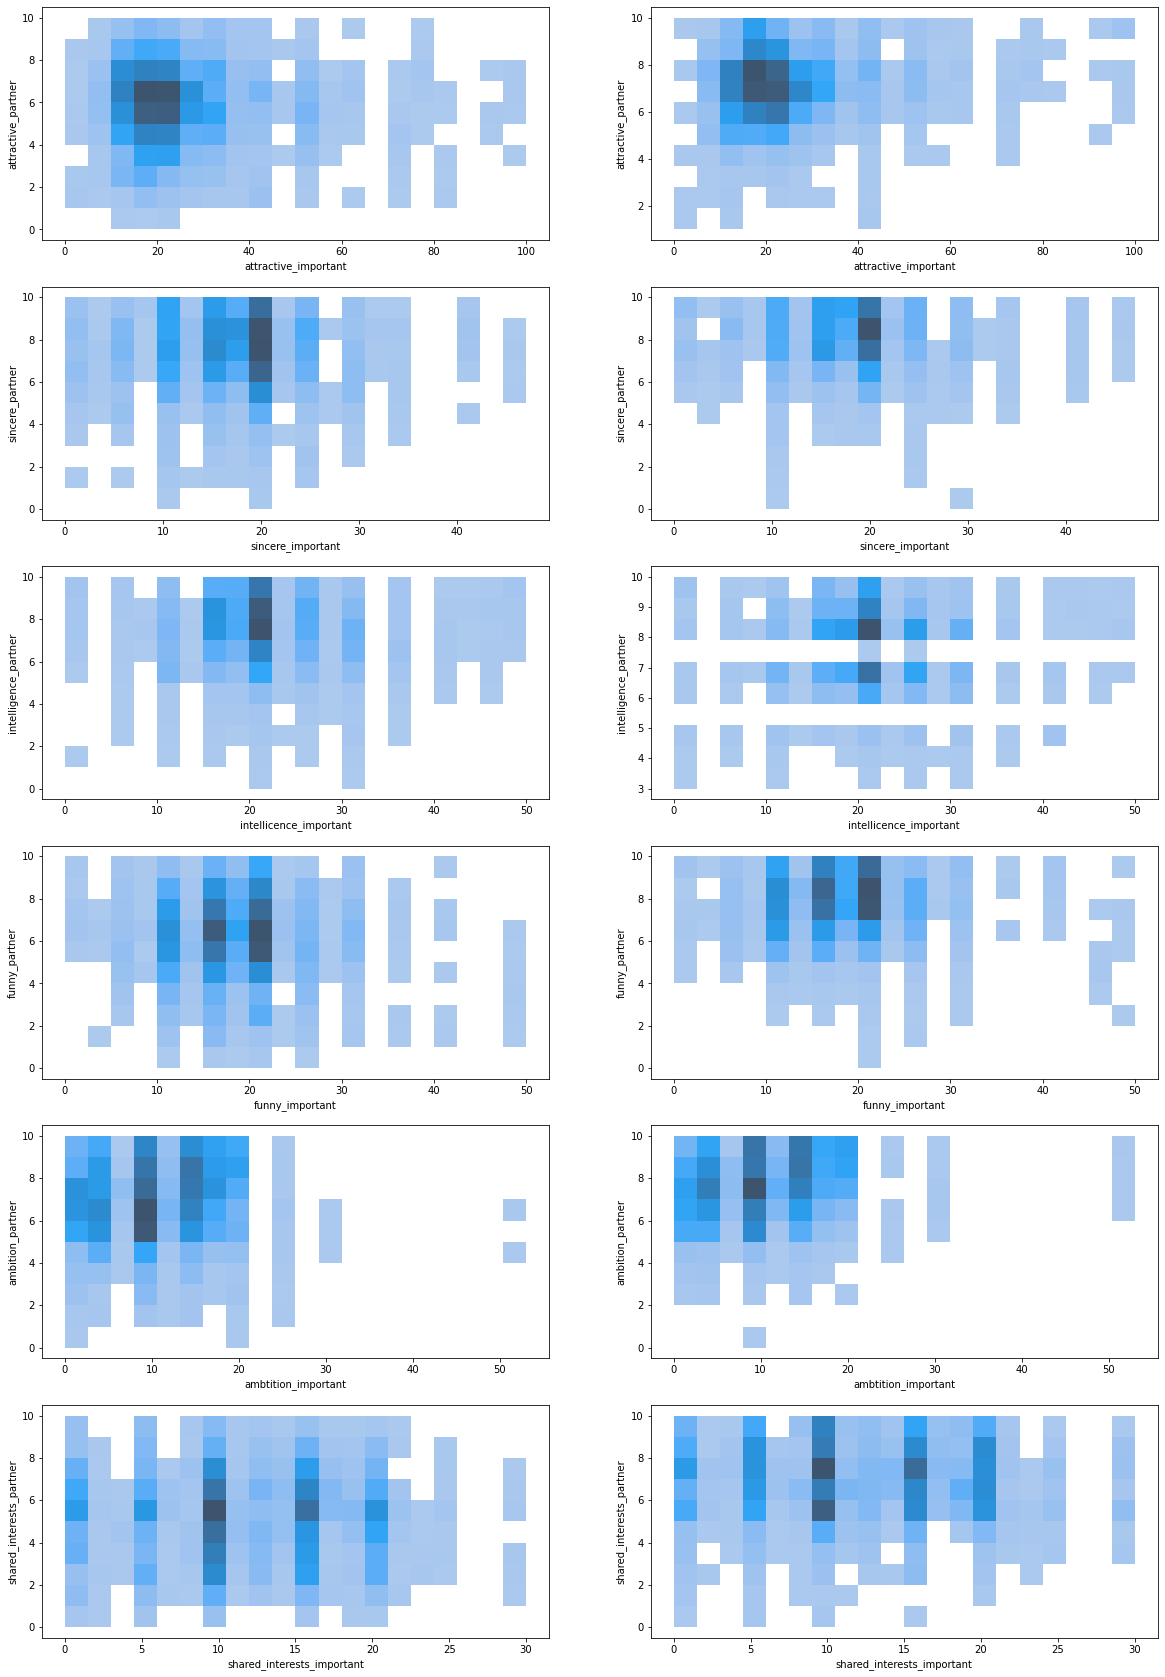

In [305]:
#Corrélation attribut par attribut entre l'importance d'un attribut et sa présence chez ceux
# non choisis (gauche) et choisis (droite)

fig=plt.figure(figsize=(20,30))
for i in range(6) :
    fig.add_subplot(6,2,2*i+1)
    barr=sns.histplot(data.loc[data['decision']==0,(ind_import[i], ind_partner[i])], 
                      x=ind_import[i], y=ind_partner[i], bins=(20,10))
    fig.add_subplot(6,2,2*i+2)
    barr=sns.histplot(data.loc[data['decision']==1,(ind_import[i], ind_partner[i])], 
                      x=ind_import[i], y=ind_partner[i], bins=(20,10))
    

Pas de corrélation. On regarde cependant un vecteur d'attributs, donc il faut trouver un moyen d'avoir un score pour les 6 termes à la fois

# Notes à supprimer, pour tests / vérifications

In [273]:

data.head(10)

,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match
0,1.0,b'female',21.0,27.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',0,2.0,4.0,b'Law',35.00,20.00,20.00,20.00,0.00,5.00,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.14,3.0,2.0,4.0,7.0,6.0,0.0,True,False,0
1,1.0,b'female',21.0,22.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',0,2.0,4.0,b'Law',60.00,0.00,0.00,40.00,0.00,0.00,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.54,3.0,2.0,4.0,7.0,5.0,1.0,True,False,0
2,1.0,b'female',21.0,22.0,b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',1,2.0,4.0,b'Law',19.00,18.00,19.00,18.00,14.00,12.00,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.16,3.0,2.0,4.0,7.0,NaN,1.0,True,True,1
3,1.0,b'female',21.0,23.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',0,2.0,4.0,b'Law',30.00,5.00,15.00,40.00,5.00,5.00,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.61,3.0,2.0,4.0,7.0,6.0,0.0,True,True,1
4,1.0,b'female',21.0,24.0,b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',0,2.0,4.0,b'Law',30.00,10.00,20.00,10.00,10.00,20.00,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.21,3.0,2.0,4.0,6.0,6.0,0.0,True,True,1
5,1.0,b'female',21.0,25.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',0,2.0,4.0,b'Law',50.00,0.00,30.00,10.00,0.00,10.00,7.0,7.0,8.0,8.0,7.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,4.0,9.0,7.0,4.0,6.0,4.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.25,3.0,2.0,4.0,6.0,5.0,0.0,False,True,0
6,1.0,b'female',21.0,30.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',0,2.0,4.0,b'Law',35.00,15.00,25.00,10.00,5.00,10.00,3.0,6.0,7.0,5.0,8.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,7.0,4.0,6.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.34,3.0,2.0,4.0,6.0,5.0,0.0,True,False,0
7,1.0,b'female',21.0,27.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',0,2.0,4.0,b'Law',33.33,11.11,11.11,11.11,11.11,22.22,6.0,7.0,5.0,6.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,4.0,9.0,7.0,6.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.50,3.0,2.0,4.0,6.0,7.0,NaN,False,False,0
8,1.0,b'female',21.0,28.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',0,2.0,4.0,b'Law',50.00,0.00,25.00,10.00,0.00,15.00,7.0,7.0,8.0,8.0,8.0,9.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,9.0,8.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0

In [ ]:
iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,
age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,
attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,
like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,
goal,date,go_out,career,career_c,
sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,
exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,
attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,
attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,
attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,
attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,
dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,
attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,
satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,
attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,
attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,
you_call,them_cal,date_3,numdat_3,num_in_3,
attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3

In [ ]:
1,1,0,1,1,1,10,7,,4,1,11,0,0.14,0,
27,2,35.00,20.00,20.00,20.00,0.00,5.00,0,
6.00,8.00,8.00,8.00,8.00,6.00,
7.00,4.00,2,21,Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",
2,7,1,lawyer,,
9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,
3,2,15.00,20.00,20.00,15.00,15.00,15.00,
,,,,,,
35.00,20.00,15.00,20.00,5.00,5.00,
6,8,8,8,7,
,,,,,
1,6.00,9.00,7.00,7.00,6.00,5.00,7.00,6.00,2,4.00,
,,,,,,,,,,,
6,2,1,,,,,,,
19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,
6,7,8,7,6,,,,,,
1,1,0,,,
15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,

In [ ]:
                                         pf_o_att                              attr_o                                                                                                                                                     attr1_1                                   attr2_1                           attr3_1          attr                          like,prob, met,match,                   attr1_2,                                        attr3_2                attr1_3,                                              attr3_3     
1,1,0,1,1,1,10,7,,4,1,11,0,0.14,0,27,2,  35.00,20.00,20.00,20.00,0.00,5.00,0,  6.00,8.00,8.00,8.00,8.00,6.00,7.00,4.00,2,21,         Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,1,6.00,9.00,7.00,7.00,6.00,5.00,7.00,6.00,2,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,3,2,12,0,0.54,0,22,2,  60.00, 0.00, 0.00,40.00,0.00,0.00,0,  7.00,8.00,10.00,7.00,7.00,5.00,8.00,4.00,2,21,        Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,1,7.00,8.00,7.00,8.00,5.00,6.00,7.00,5.00,1,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,10,3,13,1,0.16,1,22,4, 19.00,18.00,19.00,18.00,14.00,12.00,1,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,1,21, Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,1,5.00,8.00,9.00,8.00,5.00,7.00,7.00,    ,1,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,5,4,14,1,0.61,0,23,2,  30.00,5.00,15.00,40.00,5.00,5.00,1,   7.00,8.00,9.00,8.00,9.00,8.00,7.00,7.00,2,21,         Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,1,7.00,6.00,8.00,7.00,6.00,8.00,7.00,6.00,2,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,7,5,15,1,0.21,0,24,3,  30.00,10.00,20.00,10.00,10.00,20.00,1,8.00,7.00,9.00,6.00,9.00,7.00,8.00,6.00,2,21,         Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,1,5.00,6.00,7.00,7.00,6.00,6.00,6.00,6.00,2,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,6,6,16,0,0.25,0,25,2,  50.00,0.00,30.00,10.00,0.00,10.00,1,  7.00,7.00,8.00,8.00,7.00,7.00,7.00,6.00,2,21,         Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,0,4.00,9.00,7.00,4.00,6.00,4.00,6.00,5.00,2,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,1,7,17,0,0.34,0,30,2,  35.00,15.00,25.00,10.00,5.00,10.00,0, 3.00,6.00,7.00,5.00,8.00,7.00,2.00,1.00,2,21,         Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,1,7.00,6.00,7.00,4.00,6.00,7.00,6.00,5.00,2,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,2,8,18,0,0.50,0,27,2,  33.33,11.11,11.11,11.11,11.11,22.22,0,6.00,7.00,5.00,6.00,8.00,6.00,7.00,5.00,2,21,         Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,0,4.00,9.00,7.00,6.00,5.00,6.00,6.00,7.00, ,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,8,9,19,1,0.28,0,28,2,  50.00,0.00,25.00,10.00,0.00,15.00,1,  7.00,7.00,8.00,8.00,8.00,9.00,6.50,8.00,2,21,         Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,1,7.00,6.00,8.00,9.00,8.00,8.00,7.00,7.00,2,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	
1,1,0,1,1,1,10,7,,9,10,20,0,-0.36,0,24,2,100.00,0.00,0.00,0.00,0.00,0.00,0,    6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,2,21,         Law,1.00,,,,4,2,4,Chicago,"60,521","69,487.00",2,7,1,lawyer,,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,35.00,20.00,15.00,20.00,5.00,5.00,6,8,8,8,7,,,,,,1,5.00,6.00,6.00,8.00,10.00,8.00,6.00,6.00,2,4.00,,,,,,,,,,,,6,2,1,,,,,,,19.44,16.67,13.89,22.22,11.11,16.67,,,,,,,,,,,,,6,7,8,7,6,,,,,,1,1,0,,,15.00,20.00,20.00,15.00,15.00,15.00,,,,,,,,,,,,,,,,,,,5,7,7,7,7,,,,,																	


Association des attributs : 

Fichier orig : 
    
ct :
attr1_1 ; poids
attr2_1 : poids
attr3_1 : val  6,8,8,8,7
attr1_2 ; poids, inutilisé
attr3_2 : val  6,7,8,7,6
attr1_3 : poids
attr3_3 : val  5,7,7,7,7

var : 
pf_o_att 
attr_o  6.00,8.00,8.00,8.00,8.00,6.00
attr    6.00,9.00,7.00,7.00,6.00,5.00



Fichier actuel : 
    
ct :
attractive_important  : poids
attractive            : val  6,8,8,8,7

var : 
pref_o_attractive     : poids
attractive_o          : val  6.0 8.0 8.0 8.0 8.0 6.0
attractive_partner    ; val  6.0 9.0 7.0 7.0 6.0 5.0



En résumé, on a les champs ;
attractive_important : Importance donnée aux attributs par le sujet
pref_o_attractive : équivalent pour le partenaire
    
attractive : auto-évaluation par le sujet
attractive_o : évaluation du sujet par le partenaire (rating by partner the night of the event, for all 6 attributes)
attractive_partner : évaluation du partenaire par le sujet